# Statements BEGINNER

Esta tabla contiene la información de las sentencias BEGINNER.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [ ]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'statement__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('statements')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

In [20]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'statements'
TABLE_FEATURES = ['statement__category', 'statement__parent', 'statement__statement_role', 'statement__height', 'statement__depth', 'statement__has_or_else', 'statement__body_size']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-13 17:31:47.727521 Data cache files found ...
2024-05-13 17:31:48.704872 Data cache files successfully loaded!!
Features shape: (1046052, 8)
Target shape: (1046052,)
As we can see the downloaded data contains a total of 1046052 instances. Each of the instances corresponds to a program. For each program we have 8 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [5]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046052 entries, 0 to 1046051
Data columns (total 8 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   statement__category         1046052 non-null  object 
 1   statement__parent           1046052 non-null  object 
 2   statement__statement_role   1046052 non-null  object 
 3   statement__height           1046052 non-null  int64  
 4   statement__depth            1046052 non-null  int64  
 5   statement__has_or_else      235304 non-null   object 
 6   statement__body_size        247307 non-null   float64
 7   statement__expertise_level  1046052 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 63.8+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 1046052 entries, 0 to 1046051
Series name: statement__expertise_level
Non-Null Count    Dtype 
--------------    ----- 
1046052 non-null  object
dtypes: object(1)
memory usage: 8.0+ 

Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 6 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [7]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [97.98%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [8]:
X.isnull().sum()

statement__category                0
statement__parent                  0
statement__statement_role          0
statement__height                  0
statement__depth                   0
statement__has_or_else        810748
statement__body_size          798745
statement__expertise_level         0
dtype: int64

Los nulos se deben a que esos campos solo son aplicables para ciertas categorias

In [9]:
print_empty_cols(X)

statement__category
-------------------
0 instancias no tienen un valor para la columna statement__category


statement__parent
-----------------
0 instancias no tienen un valor para la columna statement__parent


statement__statement_role
-------------------------
0 instancias no tienen un valor para la columna statement__statement_role


statement__height
-----------------
0 instancias no tienen un valor para la columna statement__height


statement__depth
----------------
0 instancias no tienen un valor para la columna statement__depth


statement__has_or_else
----------------------
0 instancias no tienen un valor para la columna statement__has_or_else


statement__body_size
--------------------
0 instancias no tienen un valor para la columna statement__body_size


statement__expertise_level
--------------------------
0 instancias no tienen un valor para la columna statement__expertise_level




### 2.4 - Describimos los valores de las variables de la tabla.

In [26]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
statement__category,1046052,21,AssignmentStmt,471316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__parent,1046052,11,FunctionDef,460388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__statement_role,1046052,20,MethodDefBody,260813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__height,1046052.0,NaN,NaN,NaN,3.176048,1.946983,1.0,2.0,3.0,4.0,54.0
statement__depth,1046052.0,NaN,NaN,NaN,2.849652,2.117744,0.0,1.0,3.0,4.0,82.0
statement__has_or_else,235304,2,False,175985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__body_size,247307.0,NaN,NaN,NaN,1.893849,2.310201,1.0,1.0,1.0,2.0,276.0
statement__expertise_level,1046052,2,EXPERT,596833,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [21]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "statement__depth": [(0.0, 1.0), (1.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max: 82.0
    "statement__height": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 1.0 max: 54.0
    "statement__body_size": [(-1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 1.0 max: 276
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['statement__depth'], 10))
print(get_statistics(X_copy, ['statement__height'], 10))
print(get_statistics(X_copy, ['statement__body_size'], 10))
print(get_statistics(X_copy, ['statement__category'], 10))
print(get_statistics(X_copy, ['statement__parent'], 10))
print(get_statistics(X_copy, ['statement__statement_role'], 10))
print(get_statistics(X_copy, ['statement__has_or_else'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
statement__depth  count  percentage
       [1.0_3.0) 359588   34.375729
       [4.0_inf] 331133   31.655501
       [3.0_4.0) 228890   21.881321
       [0.0_1.0) 126441   12.087449

statement__height  count  percentage
        [3.0_4.0) 357017   34.129948
        [4.0_inf] 327109   31.270816
        [2.0_3.0) 215503   20.601557
        [0.0_2.0) 146423   13.997679

statement__body_size  count  percentage
             unknown 798745   76.358059
           [1.0_2.0) 153962   14.718389
           [2.0_inf]  93345    8.923553

statement__category  count  percentage
     AssignmentStmt 471316   45.056651
                 If 168764   16.133424
             Return 114609   10.956339
         ImportFrom  68846    6.581508
                For  42423    4.055535
             Import  36192    3.459866
             Assert  33849    3.235881
              Raise  23109    2.209164
AugmentedAssignment  19680    1.881360
                Try  15199    1.452987

statement__parent  

In [43]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1046052, 59)
Target shape: (1046052,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

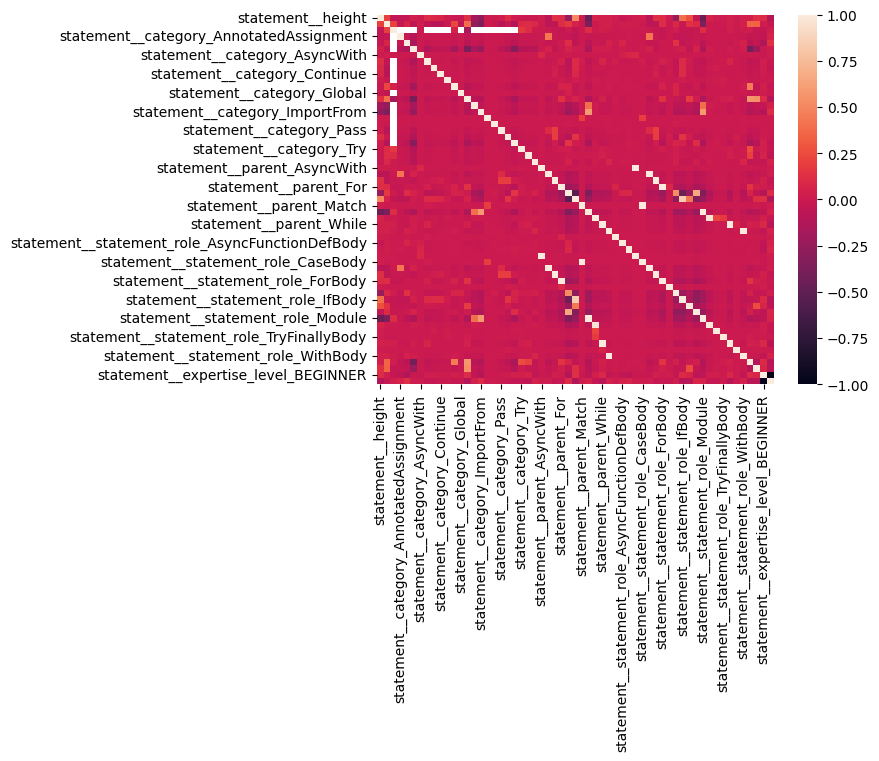

In [45]:
sns.heatmap(X.corr(), annot=False)

Se aprecian muchas relaciones pero habrá que mirar como mejorar este diagrama para que sea legible

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 7 variable (1 booleanas, 3 numericas y 3 categóricas) se hara un analisis detallado 

### Variable has_or_else (1/7)
Esta variable es de tipo booleano y representa si ciertas categorias de statements tienen la clausula else. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='statement__has_or_else', ylabel='Count'>

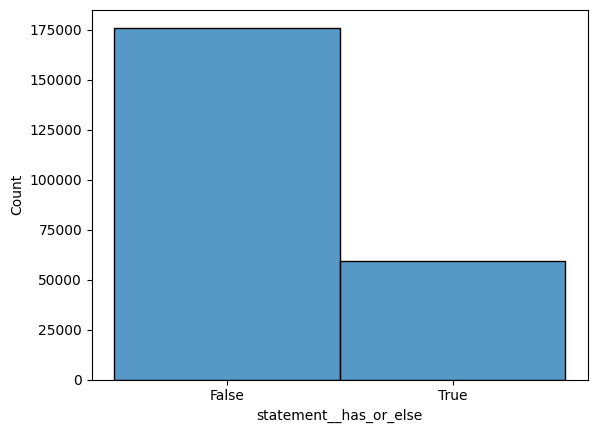

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['statement__has_or_else'], discrete=True)

In [23]:
num_true_values = len(X[X['statement__has_or_else'] == True])
num_false_values = len(X[X['statement__has_or_else'] == False])
std = X['statement__has_or_else'].std()
freq_true = len(X[X['statement__has_or_else'] == True]) / len(X['statement__has_or_else'])
freq_false = len(X[X['statement__has_or_else'] == False]) / len(X['statement__has_or_else'])
print(f'La variable has_or_else contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a False es {freq_false}.')

La variable has_or_else contiene 59319 valores verdaderos y 175985 valores falsos. Y, la desviación típica es de 0.434216527294958
La frecuencia con la que programa puede tener la variable has_or_else a True es 0.05670750593660736.
La frecuencia con la que programa puede tener la variable has_or_else a False es 0.16823733428166096.


No suma el 100% debido a los valores nulos

In [24]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'statement__has_or_else', possible_values)

La variable statement__has_or_else contiene 3 valores distintos.
El umbral de outlier es de 0.06666666666666667%
La variable statement__has_or_else toma el valor de False en un 16.82% de los items.
La variable statement__has_or_else toma el valor de True en un 5.671% de los items.
La variable statement__has_or_else toma el valor de None en un 0.0% de los items. [OUTLIER]


In [25]:
X[X['statement__has_or_else'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,59319,59319,59319,59319.000000,59319.000000,59319,59319.000000,59319
unique,4,11,20,NaN,NaN,1,NaN,2
top,If,If,IfElseBody,NaN,NaN,True,NaN,BEGINNER
freq,57989,27923,18332,NaN,NaN,59319,NaN,33995
mean,NaN,NaN,NaN,4.224447,5.805121,NaN,1.763651,NaN
std,NaN,NaN,NaN,3.002987,3.210542,NaN,1.698002,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,4.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,4.000000,5.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,5.000000,7.000000,NaN,2.000000,NaN


### Variable height (2/7)
Esta variable representa la distancia del statement al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 54. Con una media de 3.176.

<Axes: ylabel='statement__height'>

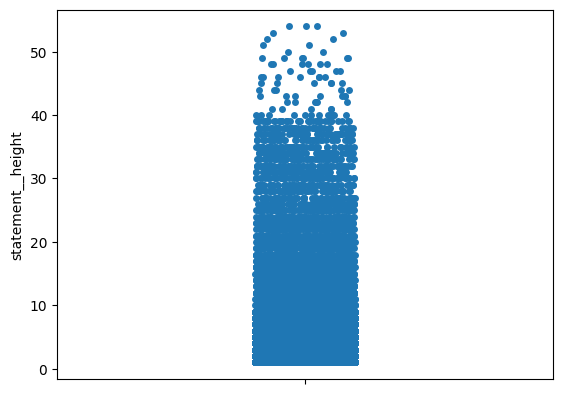

In [27]:
sns.stripplot(X['statement__height'])

In [28]:
print_outliers_for_df_column(X, 'statement__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8725794972925693
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8584943950679158,102.38912482097692]
-3.0IQR: 0 instancias tienen un valor para statement__height inferior a -4.0 (Q1-3*IQR) para statement__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__height inferior a -1.0 (Q1-1.5*IQR) para statement__height. Representando un 0.0% del total de instancias.
+1.5IQR: 21972 instancias tienen un valor para statement__height superior a 7.0 (Q3+1.5*IQR) para statement__height. Representando un 2.1% del total de instancias.
+3.0IQR: 6054 instancias tienen un valor para statement__height superior a 10.0 (Q3-3*IQR) para statement__height. Representando un 0.5787% del total de instancias.
L: 146423 instancias tienen un valor para statement__height inferior a 1.8584943950

In [29]:
X[X['statement__height'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,6054,6054,6054,6054.000000,6054.000000,2249,2253.000000,6054
unique,17,8,11,NaN,NaN,2,NaN,2
top,AssignmentStmt,If,IfBody,NaN,NaN,True,NaN,BEGINNER
freq,2329,5599,3572,NaN,NaN,1516,NaN,3550
mean,NaN,NaN,NaN,16.970763,4.782293,NaN,1.823347,NaN
std,NaN,NaN,NaN,7.836486,5.582493,NaN,1.402499,NaN
min,NaN,NaN,NaN,11.000000,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,11.000000,2.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,13.000000,3.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,19.000000,5.000000,NaN,2.000000,NaN


### Variable depth (3/7)
Esta variable representa la distancia desde el statement hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 82. Con una media de 2.8496.

<Axes: ylabel='statement__depth'>

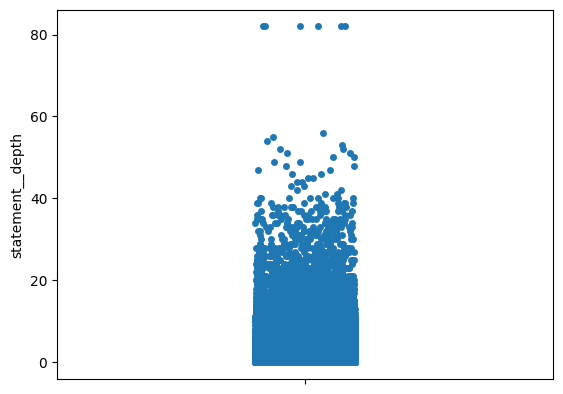

In [30]:
sns.stripplot(X['statement__depth'])

In [31]:
print_outliers_for_df_column(X, 'statement__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8989824079413955
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8064774103634904,168.02306013879394]
-3.0IQR: 0 instancias tienen un valor para statement__depth inferior a -8.0 (Q1-3*IQR) para statement__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__depth inferior a -3.5 (Q1-1.5*IQR) para statement__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 13568 instancias tienen un valor para statement__depth superior a 8.5 (Q3+1.5*IQR) para statement__depth. Representando un 1.297% del total de instancias.
+3.0IQR: 1732 instancias tienen un valor para statement__depth superior a 13.0 (Q3-3*IQR) para statement__depth. Representando un 0.1656% del total de instancias.
L: 126441 instancias tienen un valor para statement__depth inferior a 0.8064774103634904 

In [32]:
X[X['statement__depth'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,1732,1732,1732,1732.000000,1732.000000,1620,1625.000000,1732
unique,8,9,13,NaN,NaN,2,NaN,2
top,If,If,IfElseBody,NaN,NaN,True,NaN,BEGINNER
freq,1366,1116,971,NaN,NaN,1198,NaN,953
mean,NaN,NaN,NaN,7.739607,19.975173,NaN,3.207385,NaN
std,NaN,NaN,NaN,7.376308,8.001947,NaN,7.810215,NaN
min,NaN,NaN,NaN,1.000000,14.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,15.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,17.000000,NaN,2.000000,NaN
75%,NaN,NaN,NaN,10.000000,22.000000,NaN,3.000000,NaN


### Variable body_size (4/7)
Esta variable representa el número de sentencias o expresiones que se definen dentro del cuerpo de ciertas categorías de sentencias. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 276. Con una media de 1.8938.

<Axes: ylabel='statement__body_size'>

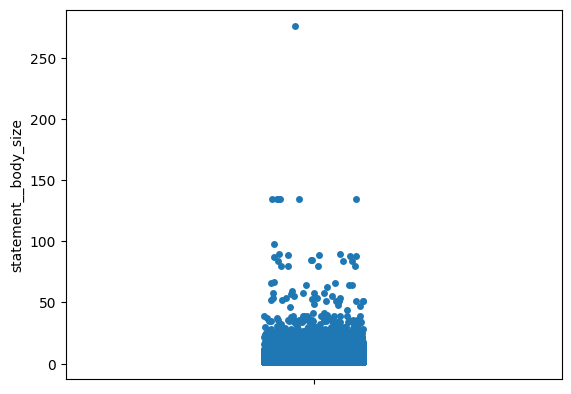

In [33]:
sns.stripplot(X['statement__body_size'])

In [38]:
print_outliers_for_df_column(X,'statement__body_size')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8690787805747522
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9283749656168571,50.51049811051615]
-3.0IQR: 0 instancias tienen un valor para statement__body_size inferior a -2.0 (Q1-3*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__body_size inferior a -0.5 (Q1-1.5*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
+1.5IQR: 24803 instancias tienen un valor para statement__body_size superior a 3.5 (Q3+1.5*IQR) para statement__body_size. Representando un 2.371% del total de instancias.
+3.0IQR: 9651 instancias tienen un valor para statement__body_size superior a 5.0 (Q3-3*IQR) para statement__body_size. Representando un 0.9226% del total de instancias.
L: 0 instancias tienen un valor para statement__body_size in

In [37]:
X[X['statement__body_size'] > 50].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,52,52,52,52.000000,52.000000,51,52.000000,52
unique,5,4,6,NaN,NaN,2,NaN,2
top,If,Module,Module,NaN,NaN,False,NaN,BEGINNER
freq,32,35,35,NaN,NaN,48,NaN,27
mean,NaN,NaN,NaN,1.403846,5.961538,NaN,79.576923,NaN
std,NaN,NaN,NaN,0.664495,4.736018,NaN,37.921149,NaN
min,NaN,NaN,NaN,1.000000,2.000000,NaN,51.000000,NaN
25%,NaN,NaN,NaN,1.000000,3.000000,NaN,54.750000,NaN
50%,NaN,NaN,NaN,1.000000,5.000000,NaN,66.000000,NaN
75%,NaN,NaN,NaN,2.000000,7.000000,NaN,88.000000,NaN


### Variable category (5/7)
Esta variable es de tipo categórica y representa el tipo de sentencia.

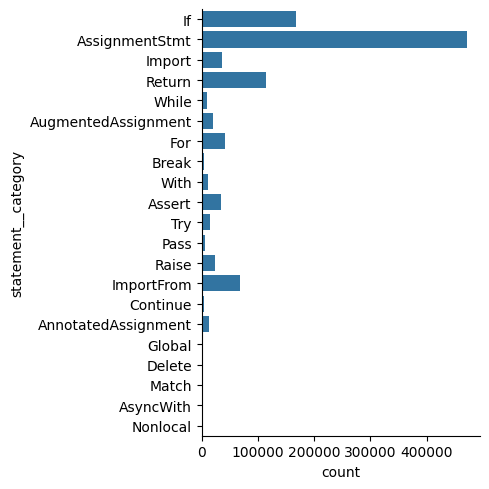

In [39]:
sns.catplot(full_table['statement__category'], kind="count")

In [40]:
print_frequency_anal_for_cat_var(full_table, 'statement__category')

La variable statement__category contiene 21 valores distintos.
El umbral de outlier es de 0.009523809523809525%
La variable statement__category toma el valor de AssignmentStmt en un 45.06% de los items.
La variable statement__category toma el valor de If en un 16.13% de los items.
La variable statement__category toma el valor de Return en un 10.96% de los items.
La variable statement__category toma el valor de ImportFrom en un 6.582% de los items.
La variable statement__category toma el valor de For en un 4.056% de los items.
La variable statement__category toma el valor de Import en un 3.46% de los items.
La variable statement__category toma el valor de Assert en un 3.236% de los items.
La variable statement__category toma el valor de Raise en un 2.209% de los items.
La variable statement__category toma el valor de AugmentedAssignment en un 1.881% de los items.
La variable statement__category toma el valor de Try en un 1.453% de los items.
La variable statement__category toma el valor

### Variable parent (6/7)
Esta variable es de tipo categórica y representa el tipo del padre de la sentencia.

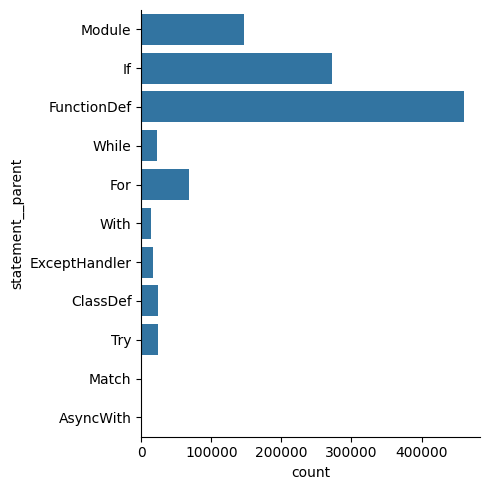

In [41]:
sns.catplot(full_table['statement__parent'], kind="count")

In [42]:
print_frequency_anal_for_cat_var(full_table, 'statement__parent')

La variable statement__parent contiene 11 valores distintos.
El umbral de outlier es de 0.018181818181818184%
La variable statement__parent toma el valor de FunctionDef en un 44.01% de los items.
La variable statement__parent toma el valor de If en un 25.96% de los items.
La variable statement__parent toma el valor de Module en un 14.0% de los items.
La variable statement__parent toma el valor de For en un 6.505% de los items.
La variable statement__parent toma el valor de ClassDef en un 2.253% de los items.
La variable statement__parent toma el valor de Try en un 2.246% de los items.
La variable statement__parent toma el valor de While en un 2.081% de los items.
La variable statement__parent toma el valor de ExceptHandler en un 1.564% de los items.
La variable statement__parent toma el valor de With en un 1.343% de los items.
La variable statement__parent toma el valor de AsyncWith en un 0.02266% de los items.
La variable statement__parent toma el valor de Match en un 0.02017% de los 

### Variable statement_role (7/7)
Esta variable es de tipo categórica y representa el rol que representa la sentencia en su padre.

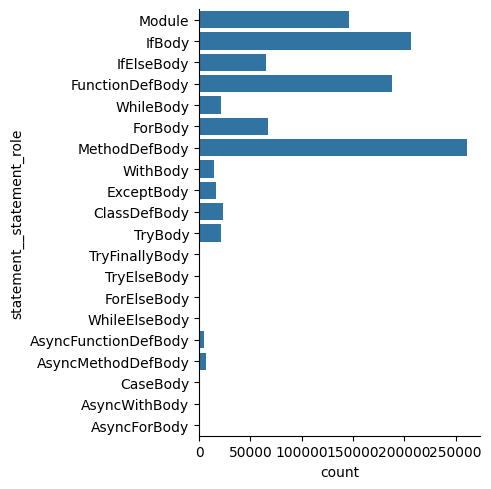

In [46]:
sns.catplot(full_table['statement__statement_role'], kind="count")

In [47]:
print_frequency_anal_for_cat_var(full_table, 'statement__statement_role')

La variable statement__statement_role contiene 20 valores distintos.
El umbral de outlier es de 0.01%
La variable statement__statement_role toma el valor de MethodDefBody en un 24.93% de los items.
La variable statement__statement_role toma el valor de IfBody en un 19.73% de los items.
La variable statement__statement_role toma el valor de FunctionDefBody en un 17.99% de los items.
La variable statement__statement_role toma el valor de Module en un 14.0% de los items.
La variable statement__statement_role toma el valor de ForBody en un 6.435% de los items.
La variable statement__statement_role toma el valor de IfElseBody en un 6.23% de los items.
La variable statement__statement_role toma el valor de ClassDefBody en un 2.253% de los items.
La variable statement__statement_role toma el valor de WhileBody en un 2.072% de los items.
La variable statement__statement_role toma el valor de TryBody en un 2.063% de los items.
La variable statement__statement_role toma el valor de ExceptBody en